In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

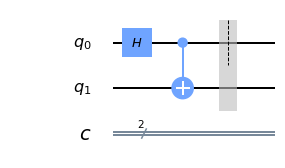

In [2]:
circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)
circ.barrier(0)
#circ.measure(0,0)
circ.draw()

In [3]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)
#wektory stanu pokazują obliczone wartości

[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


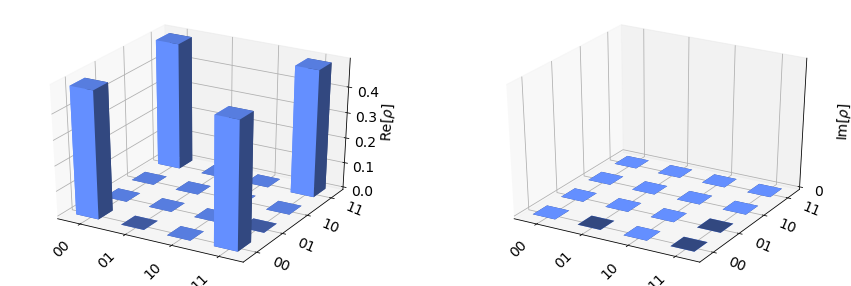

In [4]:
from qiskit.visualization import plot_state_city
#macierz gęstości pokazuje rozserzoną interpretację stanu kwantowego
plot_state_city(outputstate)

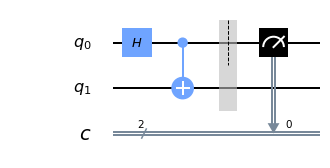

In [5]:
circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)
circ.barrier(0)
circ.measure(0,0)
circ.draw()

{'00': 510, '01': 514}


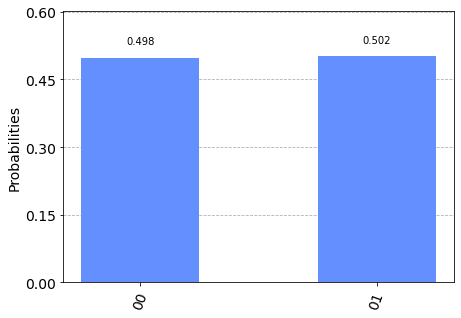

In [6]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
#histogram z symulatora pokozuje prawdopodobieństwo zaistnienia poszczególnych stanów
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [7]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_essex')
from qiskit.tools.monitor import job_monitor

In [8]:
job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


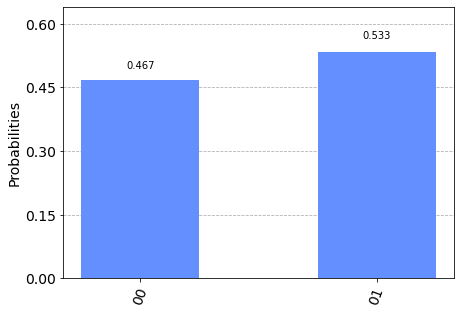

In [9]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram(counts_exp)
#histogram z prawdziwego komuptera kwantowego pokazuje prawdopodobieństwo zaistnienia poszczególnych stanów

W jaki sposób otrzymujemy:
1. dokładną amplitudę otrzymujemy poprzez dokładne matematyczne obliczenia
2. macierz gęstości również otrzymujemy poprzez obliczenia matematyczne
3. histogram z symulatora jest stworzony na podstawie wyników wielokrotnie powtórzonych (1024) symulacji zawierajacych elementy losowości
4. histogram z prawdziwego komputera kwantowego jest stworzony na podstawie wielokrotnie powtórzonych (1024) obliczeń kwantowych i ich pomiarów

Skąd biorą się różnice:

Dokładne amplitudy i macierz gęstości przedstawiają te same - idealne - wyniki obliczeń, dostepne bez pomiaru. Wyniki te różnią się od tych z rzeczywistego komputera kwantowego które powstają powstają przez obserwację, łatwych do zaburzenia, stanów fizycznych kubitów. Wyniki z symulatora mają naśladować wyniki rzeczywistego komputera kwantowego.